
# Project - NLP ChatBot Interface


<a id='q10'></a>
# <span style="font-family: Calibari; font-weight:bold;font-size:1.6em;color:#00008B;">Contents:
 
[<span style="font-family: Calibari; font-weight:bold;font-size:1.40em;color:#008000;">Problem Statement](#Problem_Statement)
 
[<span style="font-family: Calibari; font-weight:bold;font-size:1.40em;color:#008000;">Solution Implemented](#Solution)
    
[<span style="font-family: Calibari; font-weight:bold;font-size:1.20em;color:#000080;">1. Import & Store the dataset](#q1)
    
[<span style="font-family: Calibari; font-weight:bold;font-size:1.20em;color:#000080;">2. Read the Dataset ](#q2)
 
[<span style="font-family: Calibari; font-weight:bold;font-size:1.20em;color:#000080;">3. EDA](#q3)
    
[<span style="font-family: Calibari; font-weight:bold;font-size:1.20em;color:#000080;">4. Clean-up of Description Attribute](#q4)    
    
   
[<span style="font-family: Calibari; font-weight:bold;font-size:1.20em;color:#000080;">5. Word Cloud ](#q5)

[<span style="font-family: Calibari; font-weight:bold;font-size:1.20em;color:#000080;">6. NLP Pre-Processing ](#q6)    
    
[<span style="font-family: Calibari; font-weight:bold;font-size:1.20em;color:#000080;">7. Base Model ](#q7)    
  


<span style="font-family: Cambira; font-weight:bold;font-size:2.5em;color:gold;">Problem Statement
<a id='Problem_Statement'></a>

## <span style="font-family: Cambira; font-weight:bold;font-size:1.4em;color:#00008B;">Domain
    
Industrial safety. NLP based Chatbot.
       
    
#### <span style="font-family: Cambira; font-weight:bold;font-size:1.4em;color:#00008B;"> Context:
    
The database comes from one of the biggest industry in Brazil and in the world. It is an urgent need for industries/companies around the globe to understand why employees still suffer some injuries/accidents in plants. Sometimes they also die in such environment.

#### <span style="font-family: Cambira; font-weight:bold;font-size:1.4em;color:#00008B;">Dataset Description:

This The database is basically records of accidents from 12 different plants in 03 different countries which every line in the data is an occurrence of an accident.

**Columns Description:**
    
‣ Data: timestamp or time/date information
    
‣ Countries: which country the accident occurred (anonymised)
    
‣ Local: the city where the manufacturing plant is located (anonymised)
    
‣ Industry sector: which sector the plant belongs to
    
‣ Accident level: from I to VI, it registers how severe was the accident (I means not severe but VI means very severe)
    
‣ Potential Accident Level: Depending on the Accident Level, the database also registers how severe the accident could have been (due to other factors involved in the accident)
    
‣ Genre: if the person is male of female
    
‣ Employee or Third Party: if the injured person is an employee or a third party
    
‣ Critical Risk: some description of the risk involved in the accident
    
‣ Description: Detailed description of how the accident happened.
    
    
#### <span style="font-family: Cambira; font-weight:bold;font-size:1.4em;color:#00008B;">Project Objective:    

Design a ML/DL based chatbot utility which can help the professionals to highlight the safety risk as per the incident description
    
   

<span style="font-family: Cambira; font-weight:bold;font-size:2.5em;color:#00008B;">Solution Implemented
<a id='Solution'></a>
[<span style="float: right;font-weight:bold;font-size:.60em;color:#000080;">Back to Top](#q10)

<span style="font-family: Arial; font-size:2em;color:gold;"> Importing the Libraries

In [1]:
import pandas as pd # for Data Analysis
import numpy as np # for Numerical calculations
import matplotlib.pyplot as plt # for Graphical representation
%matplotlib inline
import seaborn as sns
sns.set (color_codes=True) # setting the colors 
sns.set(style="whitegrid")
from scipy.stats import norm


import tensorflow as tf # for Tensorflow network
from tensorflow.keras.models import Sequential # to add sequential layers
from tensorflow.keras.layers import Flatten # to add the flatten layer
from tensorflow.keras.layers import Dense, Embedding,LSTM,Bidirectional # to add multiple layers, dropouts etc
from tensorflow.keras import regularizers, optimizers # to import regularizer and optimizers
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.preprocessing.text import Tokenizer

from nltk.corpus import stopwords # to exclude stopwords
import re # for regular expression
from nltk.stem.wordnet import WordNetLemmatizer # Word lemmatizer

from sklearn.model_selection import train_test_split # to split the data into train & Test
from sklearn import metrics # to use metrics function of sklearn
import random # for consistent random results 
random.seed(0) # to ensure the redundant results

import warnings # for Warning 
warnings.filterwarnings('ignore') # to avoid showing warnings
print("\033[1mLibraries imported \033[0m \n")  # Print message

Libraries imported  



In [2]:
from imblearn.over_sampling import SMOTE

<span style="font-family: Arial; font-size:2em;color:gold;"> 1. Import & Store the Dataset
<a id=q1></a>
[<span style="float: right;font-weight:bold;font-size:.75em;color:#000080;">Back to Top](#q10)

In [3]:
safety_df=pd.read_csv('IHMStefanini_industrial_safety_and_health_database_with_accidents_description.csv')

<span style="font-family: Arial; font-size:1.4em;color:green;"> Observations: </p>

* Read the data from the CSV file and saved into a Dataframe

<span style="font-family: Arial; font-size:2em;color:gold;"> 2. Read the Dataset
<a id=q2></a>
[<span style="float: right;font-weight:bold;font-size:.75em;color:#000080;">Back to Top](#q10)

<span style="font-family: Arial; font-size:1.4em;color:blue;"> 2.1. Check first few rows of DataFrame </p>

In [4]:
safety_df.head()

,Unnamed: 0,Data,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description
0,0,2016-01-01 00:00:00,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...
1,1,2016-01-02 00:00:00,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...
2,2,2016-01-06 00:00:00,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...
3,3,2016-01-08 00:00:00,Country_01,Local_04,Mining,I,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...
4,4,2016-01-10 00:00:00,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...


<span style="font-family: Arial; font-size:1.4em;color:blue;"> 2.2. Check the Datatypes of the DataFrame </p>

In [5]:
safety_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Unnamed: 0                425 non-null    int64 
 1   Data                      425 non-null    object
 2   Countries                 425 non-null    object
 3   Local                     425 non-null    object
 4   Industry Sector           425 non-null    object
 5   Accident Level            425 non-null    object
 6   Potential Accident Level  425 non-null    object
 7   Genre                     425 non-null    object
 8   Employee or Third Party   425 non-null    object
 9   Critical Risk             425 non-null    object
 10  Description               425 non-null    object
dtypes: int64(1), object(10)
memory usage: 36.6+ KB


<span style="font-family: Arial; font-size:1.4em;color:green;"> Observations: </p>

* it is observed that except attribute " Unnamed: 0" all others have datatype as object which means they contains text values

<span style="font-family: Arial; font-size:1.4em;color:blue;"> 2.3. Checking the Shape of Dataframe </p>

In [6]:
safety_df.shape

(425, 11)

<span style="font-family: Arial; font-size:1.4em;color:green;"> Observations: </p>

* Dataset has 425 rows and 11 attributes

<span style="font-family: Arial; font-size:1.4em;color:blue;"> 2.4. Check the Null Values in the DataFrame </p>

In [7]:
def myfunc(dfname):
    lst=list(dfname.columns)
    nullcheck=dfname.isnull().values.any()
    if nullcheck == True:
        print('There are null values in the DataFrame')
    else:
        print('No Null Values in the DataFrame')
    for ax in lst:
        ze=len(dfname[dfname[ax]==0])
        ze1=len(dfname[dfname[ax]== '#'])
        ze2=len(dfname[dfname[ax]=='@'])
        ze3=len(dfname[dfname[ax]=='NaN'])
        ze4=len(dfname[dfname[ax] == " "])
        ze5=len(dfname[dfname[ax].isnull()])
        ze6=len(dfname[dfname[ax] == '?'])
        chkobj=dfname[ax].dtypes
                          
                                                                                                                                                                                                                                                                                                            
        if ze > 0:
            print('No of Zeros in attribute',ax,'is:', ze)
             
        if ze1 > 0:
            print('No of # in attribute',ax,'is:', ze1)
       
        if ze2 > 0:
             print('No of @ in attribute',ax,'is:', ze2)
        if ze3 > 0:
             print('Not a number in attribute',ax,'is:', ze3)
        if ze4 > 0:
              print('No of blank in attribute',ax,'is:', ze4)
        if ze5 > 0:
              print('No of null in attribute',ax,'is:', ze5)
        if ze6 > 0:
              print('No of Question Marks in attribute',ax,'is:', ze6)
                  
        if chkobj == float:
            ze7=len(dfname[dfname[ax] < 0])
            if ze7 > 0:
                print('Negative Values in',ax,'is:', ze7)
        if chkobj == int:
            ze8=len(dfname[dfname[ax] < 0])
            if ze8 > 0:
                print('Negative Values in',ax,'is:', ze8)
        
myfunc(safety_df)

No Null Values in the DataFrame
No of Zeros in attribute Unnamed: 0 is: 1


<span style="font-family: Arial; font-size:1.4em;color:green;"> Observations: </p>

* it is observed that dataframe has no null values. Unnamed : 0 has only 1 record as 0 which we will further explore

<span style="font-family: Arial; font-size:1.4em;color:blue;"> 2.5. Using describe function to check the 5 value summary </p>

In [8]:
safety_df.describe(include='all')

,Unnamed: 0,Data,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description
count,425.000000,425,425,425,425,425,425,425,425,425,425
unique,NaN,287,3,12,3,5,6,2,3,33,411
top,NaN,2017-02-08 00:00:00,Country_01,Local_03,Mining,I,IV,Male,Third Party,Others,On 02/03/17 during the soil sampling in the re...
freq,NaN,6,251,90,241,316,143,403,189,232,3
mean,224.084706,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,125.526786,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,118.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,226.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,332.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<span style="font-family: Arial; font-size:1.4em;color:green;"> Observations: </p>

from the abobe view of 5 point summary we have observed that:

i) attribute Unnamed: 0 has a starting value of 0 and ending with 438 which looks to be very abnormal as we only have 425 records, we will further explore this and identify why it has more number and total number of rows in dataframe

ii) attribute "Data" having values of data and time however it as given as object therefore we need to conver this into datetime format including the change of the name as "Date". Also it has only 287 unique records hence we will have multiple entries of same date

iii) Attribute "Countires" represent that we will have a data of 3 different countries

iv) attribute "Local" here we have 12 unique location across 3 different countires

v) Attribute " Industry Sector"  here also we have 3 different type of industries

vi) Attribute "Accident Level" we have 5 different type of accident levels, I being the most frequent 316 times

vii) Attribute " Potential Accident Level" here we have 6 different type of potential accident levels iv being the highest

viii) Attribute "Genre" contains 2 type of values Male being the highest " 403 out of 425 almost 95%

ix) Attribute " Employee or Third Party" contrains 3 different type, Third party being the higest

x) Attribute "Critical Risk" having 33 different type of values, other being the highest as 232

Xi) Attribute "Description" having 411 unique values which means it will have some duplicate records which we will explore further down the line

<span style="font-family: Arial; font-size:1.4em;color:blue;"> 2.6. Check the Duplciate Rows </p>

In [9]:
aa=sum(safety_df.duplicated())
if aa > 0:
    print("\033[1m""There are {:.0f} duplicates rows in the DataFrame""\033[0m".format(aa))
else:
    print("\033[1m""There are no duplicates rows in the DataFrame""\033[0m")


There are no duplicates rows in the DataFrame


In [10]:
safety_df[safety_df.duplicated()]

,Unnamed: 0,Data,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description


<span style="font-family: Arial; font-size:1.4em;color:green;"> Observations: </p>

* While checking the duplicate values in the entire dataframe we couldn't find out any duplicate values

<span style="font-family: Arial; font-size:2em;color:gold;">3. EDA
[<span style="float: right;font-weight:bold;font-size:.65em;color:#000080;">TOP](#q10)
<a id='q3'></a>


<span style="font-family: Arial; font-size:1.4em;color:green;"> Attribute Analysis Approach: </p>

In this section we will explore each attribute and share our observations based on the univaraite and bivariate analysis at the end we will conduct the multi-variate analysis

<span style="font-family: Arial; font-size:1.4em;color:blue;"> 3.1. Attibute "Unnamed: 0" </p>

As we observed in the 5 point summary above the maximum value of this arribute is 438 however we only have total 425 rows which indicates there is some abnormality therefore we will check if there are any duplicate values in this attribute or no:

In [11]:
safety_df['Unnamed: 0'][safety_df['Unnamed: 0'].duplicated()]

Series([], Name: Unnamed: 0, dtype: int64)

In [12]:
vc=safety_df['Unnamed: 0'].value_counts()
print(vc[vc > 1])

Series([], Name: Unnamed: 0, dtype: int64)


<span style="font-family: Arial; font-size:1.4em;color:green;"> Observations: </p>

* We observed that there are no duplicate values tried validating through duplciated and value count method

In [13]:
print("\x1b[10;30;46m \033[1mValidate Top 10 rows: \033[0m")
safety_df['Unnamed: 0'].head(10)

 Validate Top 10 rows: 


0    0
1    1
2    2
3    3
4    4
5    5
6    6
7    7
8    8
9    9
Name: Unnamed: 0, dtype: int64

In [14]:
print("\x1b[10;30;46m \033[1m Validate Bottom 10 rows: \033[0m")
safety_df['Unnamed: 0'].tail(10)

  Validate Bottom 10 rows: 


415    429
416    430
417    431
418    432
419    433
420    434
421    435
422    436
423    437
424    438
Name: Unnamed: 0, dtype: int64

<span style="font-family: Arial; font-size:1.4em;color:green;"> Observations: </p>

* it is observed that the attribute "Unnamed : 0" has values e.g. 1,2,3 starting from 0 to 438. it has no duplicate values, however the number are not in sequence which is observed in the bottom 10 rows e.g. index 415 having a corresponding value as 429  and last index 424 having a corresponding  values as 438. it looks more to be a index columns without proper indexing. Therefore we will drop this attribute as it will not add any values in the analysis

<span style="font-family: Arial; font-size:1.4em;color:blue;"> 3.2. Attribute Data" </p>

First we will conver the Data attribute into the datatime datatype and post which we will further expland in different attributes as "Year, Month, Day, Weekday, WeekofYear and at the end Season"

In [15]:
safety_df['Data']=pd.to_datetime(safety_df['Data'])

In [16]:
safety_df['Year']=safety_df['Data'].apply(lambda x : x.year)
safety_df['Month']=safety_df['Data'].apply(lambda x : x.month)
safety_df['Day']=safety_df['Data'].apply(lambda x : x.day)
safety_df['Weekday']=safety_df['Data'].apply(lambda x : x.day_name())
safety_df['Weekofyear']=safety_df['Data'].apply(lambda x : x.weekofyear)
safety_df

,Unnamed: 0,Data,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description,Year,Month,Day,Weekday,Weekofyear
0,0,2016-01-01,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...,2016,1,1,Friday,53
1,1,2016-01-02,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...,2016,1,2,Saturday,53
2,2,2016-01-06,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...,2016,1,6,Wednesday,1
3,3,2016-01-08,Country_01,Local_04,Mining,I,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...,2016,1,8,Friday,1
4,4,2016-01-10,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...,2016,1,10,Sunday,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420,434,2017-07-04,Country_01,Local_04,Mining,I,III,Male,Third Party,Others,"Being approximately 5:00 a.m. approximately, w...",2017,7,4,Tuesday,27
421,435,2017-07-04,Country_01,Local_03,Mining,I,II,Female,Employee,Others,The collaborator moved from the infrastructure...,2017,7,4,Tuesday,27
422,436,2017-07-05,Country_02,Local_09,Metals,I,II,Male,Employee,Venomous Animals,During the environmental monitoring activity i...,2017,7,5,Wednesday,27
423,437,2017-07-06,Country_02,Local_05,Metals,I,II,Male,Employee,Cut,The Employee performed the activity of strippi...,2017,7,6,Thursday,27


In [17]:
safety_df.sort_values(by='Weekofyear',ascending=False)

,Unnamed: 0,Data,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description,Year,Month,Day,Weekday,Weekofyear
0,0,2016-01-01,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...,2016,1,1,Friday,53
1,1,2016-01-02,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...,2016,1,2,Saturday,53
284,298,2016-12-31,Country_01,Local_04,Mining,III,IV,Male,Third Party,Others,Being approximately 8:10 p.m. Alpha operator M...,2016,12,31,Saturday,52
281,295,2016-12-26,Country_01,Local_06,Metals,I,II,Male,Employee,Others,"Mr. Marcelo withdrew foam from the ajax oven, ...",2016,12,26,Monday,52
283,297,2016-12-30,Country_01,Local_04,Mining,IV,V,Male,Third Party,Others,"At 13:40 hours, Mr. Hidalgo, wanting to climb ...",2016,12,30,Friday,52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286,300,2017-01-05,Country_01,Local_01,Mining,I,IV,Male,Third Party,Projection,In the volvo workshop at the time of cutting s...,2017,1,5,Thursday,1
287,301,2017-01-05,Country_01,Local_03,Mining,I,III,Male,Employee,Others,During the mechanized support activity in the ...,2017,1,5,Thursday,1
289,303,2017-01-07,Country_01,Local_04,Mining,I,IV,Male,Employee,Others,When making the change of support of the verti...,2017,1,7,Saturday,1
290,304,2017-01-08,Country_01,Local_06,Metals,III,III,Male,Employee,Cut,"At 11:25 a.m., the deslaminator stops untimely...",2017,1,8,Sunday,1


As we have extracted the year month and other values from the main attribute "Data" we will further append another attribute called seasons to get a view if there are any season specefic accidents or not. as we know the dataset is belongs to industries of Brazil we will get the season information from below internet:

https://www.brazil-travel-guide.com/Brazil-Weather.html

Summer: 22nd December - 21st March

Autumn: 22nd March - 21st June

Winter: 22nd June - 21st September

Spring: 22nd September - 21st December


to furter simply we will consider Summer as Jan to Mar, Autum as Apr to Jun, Winter Jul to Sep and Spring from Oct to Dec

In [18]:
def seasionconvert(t):
    if t in [1,2,3]:
        season = 'Summer'
    elif t in [4,5,6]:
        season = 'Autumn'
    elif t in [7,8,9]:
        season = 'Winter'
    elif t in [10,11,12]:
        season = 'Spring'
    return season

        
safety_df['season']=safety_df['Month'].apply(seasionconvert)

In [19]:
safety_df.head(2)

,Unnamed: 0,Data,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description,Year,Month,Day,Weekday,Weekofyear,season
0,0,2016-01-01,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...,2016,1,1,Friday,53,Summer
1,1,2016-01-02,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...,2016,1,2,Saturday,53,Summer


<span style="font-family: Arial; font-size:1.4em;color:green;"> Observations: </p>

* We have added the season also as a different attribute

#### Let's rename the attribute name from Data to Date

In [20]:
safety_df=safety_df.rename(columns={'Data' : 'Date'})

In [21]:
print("\x1b[10;30;46m \033[1mUnivariate & Bi-Variate analysis: \033[0m")

 Univariate & Bi-Variate analysis: 


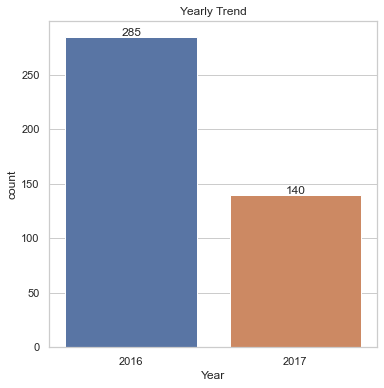

In [22]:
plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
plt.title('Yearly Trend')
ax=sns.countplot(x=safety_df['Year'])
for p in ax.patches:
    ax.annotate('{:}'.format(p.get_height()), (p.get_x()+.4, p.get_height()+1),ha='center')

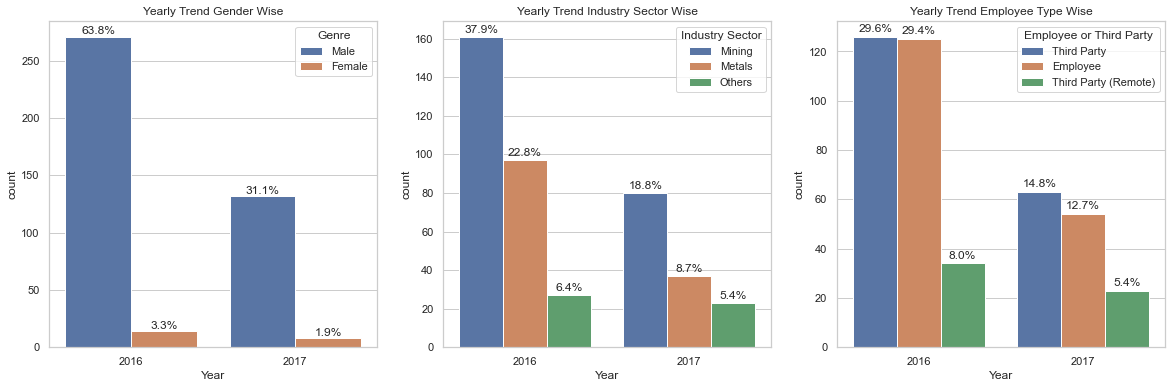

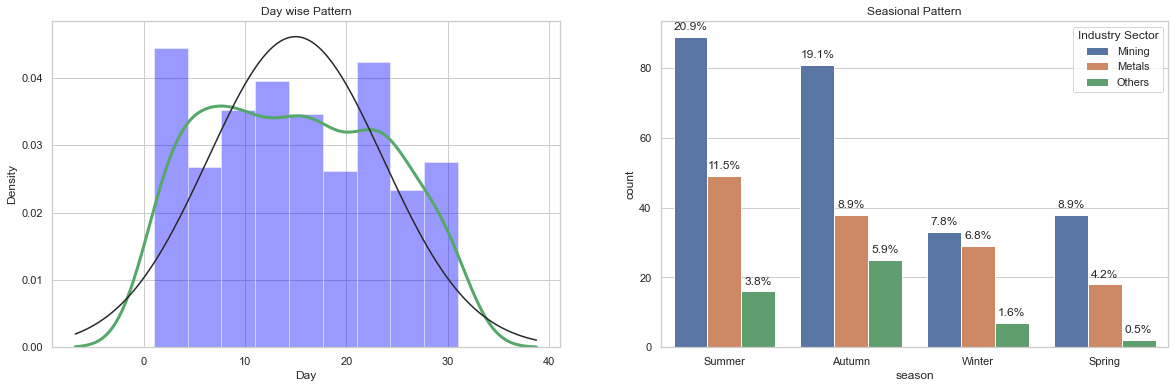

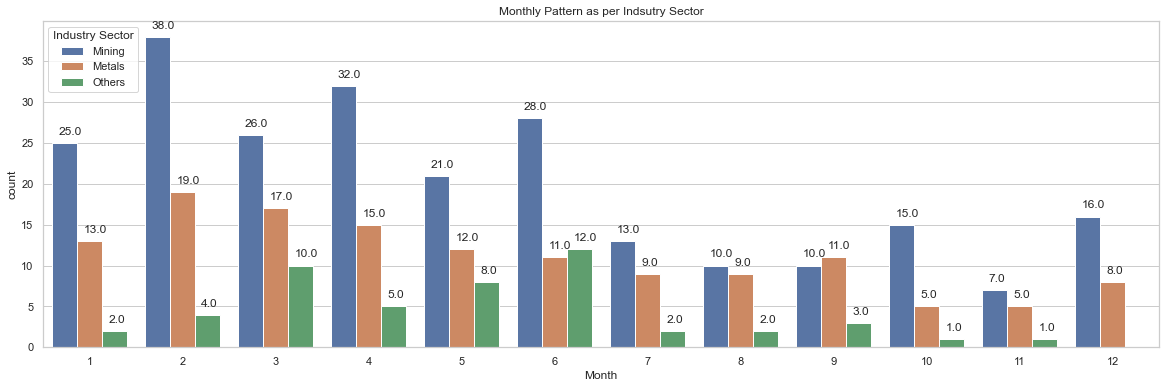

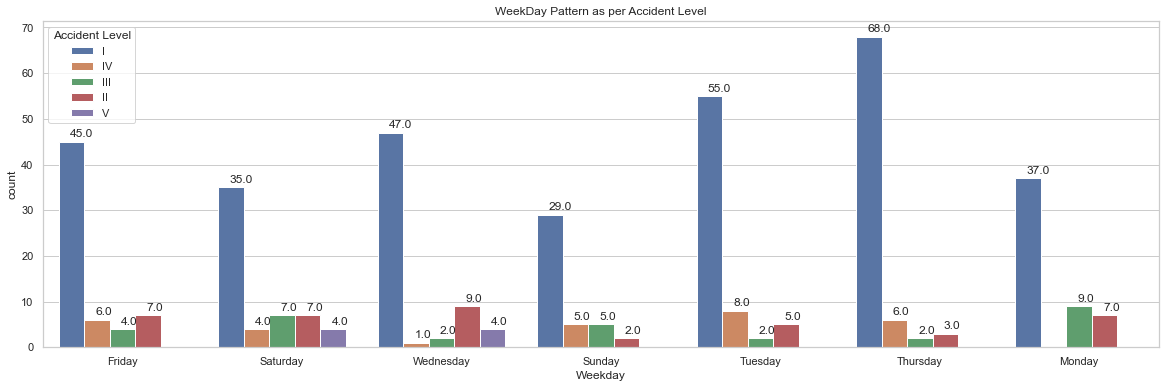

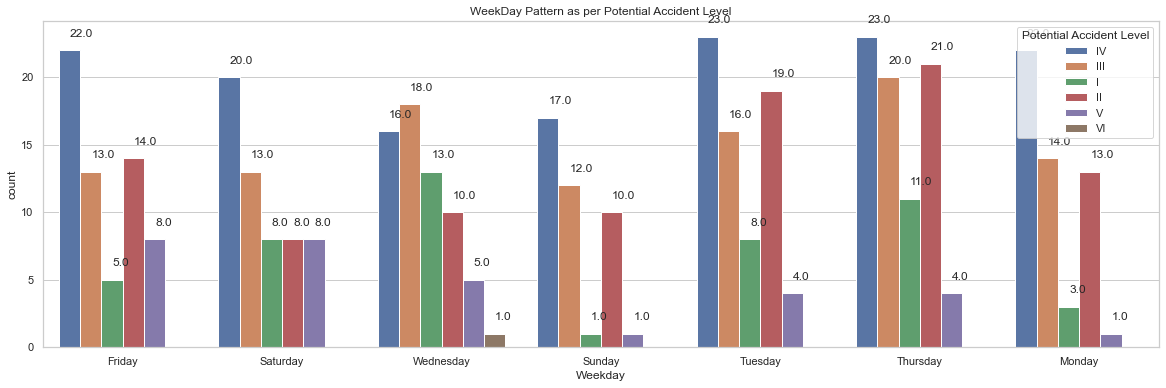

In [23]:
plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
plt.title('Yearly Trend Gender Wise')
ax=sns.countplot(x=safety_df['Year'], hue = safety_df['Genre'])

total = len(safety_df['Year'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width()/2
        y = p.get_y() + p.get_height()+2.02
        ax.annotate(percentage, (x, y),ha='center')
   
    
plt.subplot(1,3,2)
plt.title('Yearly Trend Industry Sector Wise')
ax=sns.countplot(safety_df['Year'], hue = safety_df['Industry Sector'])
total = len(safety_df['Year'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width()/2
        y = p.get_y() + p.get_height()+2.02
        ax.annotate(percentage, (x, y),ha='center')
    
plt.subplot(1,3,3)
plt.title('Yearly Trend Employee Type Wise')
ax=sns.countplot(safety_df['Year'], hue = safety_df['Employee or Third Party'])
total = len(safety_df['Year'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width()/2
        y = p.get_y() + p.get_height()+2.02
        ax.annotate(percentage, (x, y),ha='center')

    

plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
plt.title('Day wise Pattern')
sns.distplot(safety_df['Day'],fit=norm, kde=True,color='blue',kde_kws={"color": "g", "lw": 3, "label": "KDE"});
# ax=safety_df['Day'].value_counts().sort_index().plot(x='Day',kind='bar',figsize=(15,5));
# for p in ax.patches:
#     ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.07, p.get_height()+1))



#plt.figure(figsize=(20,6))
plt.subplot(1,2,2)
plt.title('Seasional Pattern')

ax=sns.countplot(safety_df['season'], hue = safety_df['Industry Sector']);
#ax=safety_df['season'].value_counts().sort_index().plot(x='season',kind='bar',figsize=(15,5));
total = len(safety_df['season'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width()/2
        y = p.get_y() + p.get_height()+2.02
        ax.annotate(percentage, (x, y),ha='center')
    

plt.figure(figsize=(20,6))
plt.title('Monthly Pattern as per Indsutry Sector')
ax=sns.countplot(safety_df['Month'], hue = safety_df['Industry Sector']);
for p in ax.patches:
    ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.07, p.get_height()+1))

plt.figure(figsize=(20,6))
plt.title('WeekDay Pattern as per Accident Level')
ax=sns.countplot(safety_df['Weekday'], hue = safety_df['Accident Level']);
for p in ax.patches:
    ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.07, p.get_height()+1))
    
plt.figure(figsize=(20,6))
plt.title('WeekDay Pattern as per Potential Accident Level')
ax=sns.countplot(safety_df['Weekday'], hue = safety_df['Potential Accident Level']);
for p in ax.patches:
     ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.07, p.get_height()+1))

In [24]:
table = pd.pivot_table(safety_df,index =['Critical Risk'],columns =['Year','Accident Level'],aggfunc={'Unnamed: 0':'count'},fill_value=0) 
# df = table.reindex(table['Unnamed: 0'].sort_values(by='I', ascending=False).index)
#df
table

Unnamed: 0                         \
Year                                            2016                2017      
Accident Level                                     I  II III  IV  V    I II   
Critical Risk                                                                 
\nNot applicable                                   0   0   0   1  0    0  0   
Bees                                              10   0   0   0  0    0  0   
Blocking and isolation of energies                 3   0   0   0  0    0  0   
Burn                                               0   0   0   0  0    0  0   
Chemical substances                               12   1   0   0  0    3  1   
Confined space                                     1   0   0   0  0    0  0   
Cut                                                6   0   0   0  0    5  2   
Electrical Shock                                   0   0   0   0  0    2  0   
Electrical installation                            0   0   0   1  0    0  0   
Fall                                               1   0   0   1  0    5  0   
Fall prevention                                    1   0   0   0  0    4  0   
Fall prevention (same level)                       5   0   0   1  0    1  0   
Individual protection equipment                    0   0   0   0  0    0  1   
Liquid Metal                                       2   0   0   0  0    1  0   
Machine Protection                                 0   0   0   0  0    2  0   
Manual Tools                                       8   4   2   0  0    4  1   
Others                                           137  19  20  12  3   35  2   
Plates                                             1   0   0   0  0    0  0   
Poll                                               0   0   0   1  0    0  0   
Power lock                                         0   0   0   0  0    0  0   
Pressed                                           12   0   1   1  0    5  1   
Pressurized Systems                                6   1   0   0  0    0  0   
Pressurized Systems / Chemical Substances          2   1   0   0  0    0  0   
Projection                                         1   0   0   0  0    9  2   
Projection of fragments                            0   0   0   0  0    2  0   
Projection/Burning                                 0   0   0   0  0    0  1   
Projection/Choco                                   0   0   0   0  0    1  0   
Projection/Manual Tools                            0   0   0   0  0    1  0   
Suspended Loads                                    3   0   1   1  0    1  0   
Traffic                                            1   0   0   0  0    0  0   
Vehicles and Mobile Equipment                      0   0   0   0  0    5  1   
Venomous Animals                                   1   0   0   0  0   15  0   
remains of choco                                   0   0   0   0  0    2  2   

                                                     
Year                                                 
Accident Level                            III IV  V  
Critical Risk                                        
\nNot applicable                            0  0  0  
Bees                                        0  0  0  
Blocking and isolation of energies          0  0  0  
Burn                                        1  0  0  
Chemical substances                         0  0  0  
Confined space                              0  0  0  
Cut                                         1  0  0  
Electrical Shock                            0  0  0  
Electrical installation                     0  0  0  
Fall                                        0  1  1  
Fall prevention                             0  1  0  
Fall prevention (same level)                0  0  0  
Individual protection equipment             0  0  0  
Liquid Metal                                0  0  0  
Machine Protection                          0  0  0  
Manual Tools                                1  0  0  
Others                                

<span style="font-family: Arial; font-size:1.4em;color:green;"> Observations: </p>
 
i)	We have observed that maximum accidents were happened  in 2016 **~68% and ~32%** in 2017 assuming that the data is for complete year

ii)	Out of total incident happened in both years **~64% & ~31% accidents were of male and 3.3% and 1.9% of accidents were of females** in year 2016 and 2017 respectively

iii) Mining related accidents were **~ 37.9%** & 18.8% however metal and other industries have significantly low contribution

iv)	Third party and employees were at the same **~29%** in 2016 which has got reduced 14.8% to 12.7%

v)	While  observing the daily trend for the entire month there is **no specific** trend identified 

vi)	When we saw the seasonal patter it is clearly visible that for **Mining industries, having higher accidents in Summer and Autumn**, When we further dig down into months, **February** is the highest contributor followed by April

vii) However metal has significant reduction of **~ 7%** while we move from summer to spring When we saw monthly trend it has decreasing trend from Mar onwards except Aug and Dec

viii) It also observed that **Thursday** was the major contributor of Level 1 accidents followed by Tuesday. Sunday being the lowest numbers. Surprisingly Monday doesn’t have any accident of level “IV”

ix)	In potential accident levels Thursday and Tuesday having maximum accidents of level IV

x)	While checking the Critical Risk it is observed that **~ 50%  of them were categorized in other category** and maximum of them were of level 1 accident level, followed by Chemical substances, Bees and Venomous Animals.  It looks theses categories can be further improved by proper categorization


<span style="font-family: Arial; font-size:1.4em;color:blue;"> 3.3. Attribute "Countries" </p>

In [25]:
safety_df['Countries'].value_counts()

Country_01    251
Country_02    130
Country_03     44
Name: Countries, dtype: int64

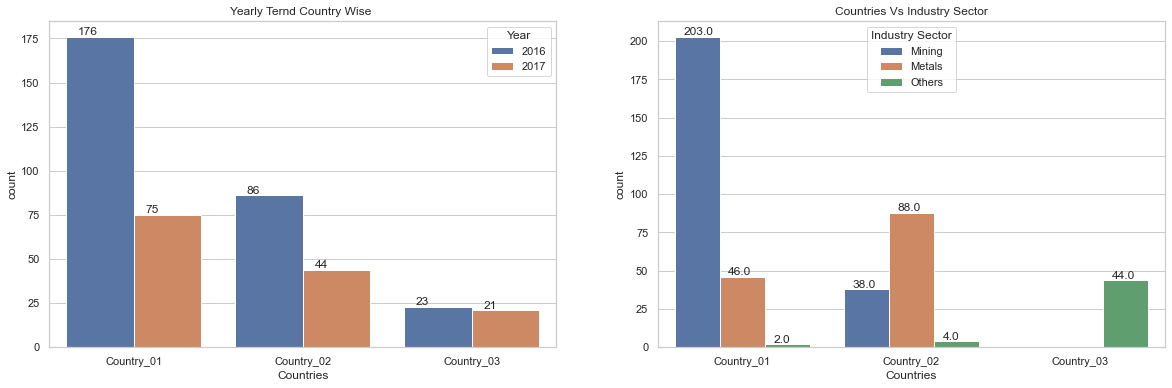

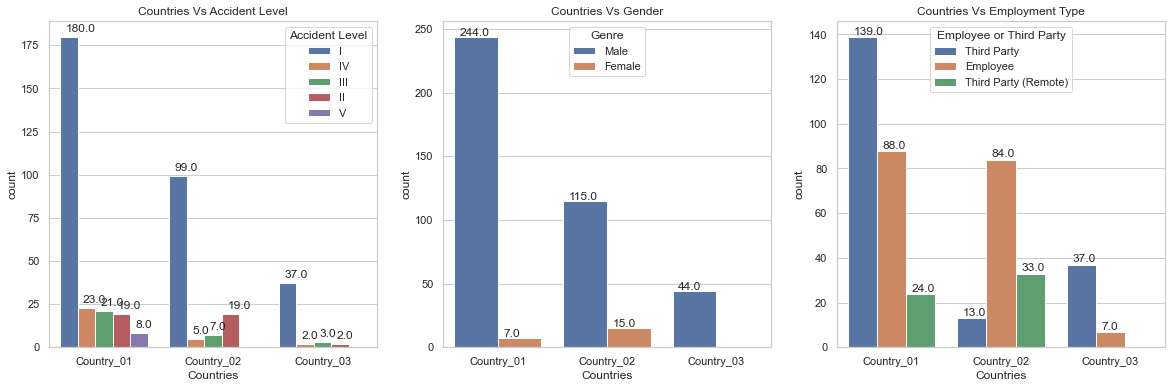

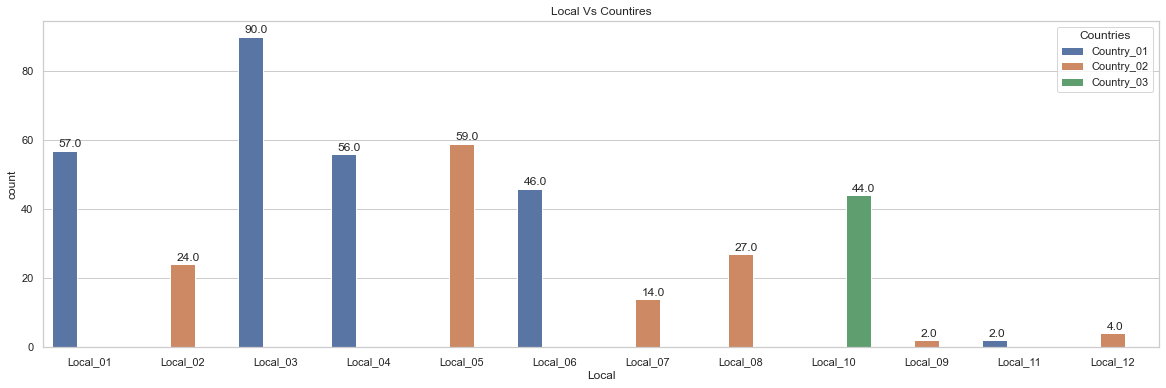

In [26]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
plt.title('Yearly Ternd Country Wise ')
ax=sns.countplot(safety_df['Countries'], hue = safety_df['Year']);
for p in ax.patches:
    ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.07, p.get_height()+1))

plt.subplot(1,2,2)
plt.title('Countries Vs Industry Sector')
ax=sns.countplot(safety_df['Countries'], hue = safety_df['Industry Sector']);
for p in ax.patches:
    ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.05, p.get_height()+1))
    
   
   
plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
plt.title('Countries Vs Accident Level')
ax=sns.countplot(safety_df['Countries'], hue = safety_df['Accident Level']);
for p in ax.patches:
    ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.05, p.get_height()+3))
    
    
plt.subplot(1,3,2)
plt.title('Countries Vs Gender')
ax=sns.countplot(safety_df['Countries'], hue = safety_df['Genre']);
for p in ax.patches:
    ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.05, p.get_height()+1))
    
    
plt.subplot(1,3,3)
plt.title('Countries Vs Employment Type')
ax=sns.countplot(safety_df['Countries'], hue = safety_df['Employee or Third Party']);
for p in ax.patches:
    ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.05, p.get_height()+1))

 
  
plt.figure(figsize=(20,6))
plt.title('Local Vs Countires')
ax=sns.countplot(safety_df['Local'], hue = safety_df['Countries']);
for p in ax.patches:
    ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.07, p.get_height()+1))

# plt.figure(figsize=(20,6))
# plt.title('Critical Risk Vs Countries')
# ax=sns.countplot(safety_df['Critical Risk'], hue = safety_df['Countries']);
# for p in ax.patches:
#     ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.07, p.get_height()+10))

<span style="font-family: Arial; font-size:1.4em;color:green;"> Observations: </p>

i) Country 01 & 02 has significant **reduction** in accident number in compression of 2016 to 2017, however country 3 has almost similar numbers

ii)	Country 01 has more accident in **Mining** and country 02 are more in **Metal**, other type of industries have more accidents in country 03

iii) Accident Level **I has more numbers in all 3 countries**, however Level V type of accidents were only there in country 01

iv)	**No female accident** were in country 03,  However, country 2 have more female accidents than country 01

v)	In country 01 Third Party employee have 139 accident which is almost 32% of total accidents, however Country 02 have **~90% less** accidents in comparison to country 01 for third party employees

vi)	**Local_03**, which is a country 01 location having **maximum** number of accidents, followed by Local 1 and Local 4. Country 02 have more numbers in Local_05

In [27]:
safety_df['Countries']=safety_df['Countries'].map({'Country_01' : 0, 'Country_02' : 1,'Country_03' : 2})

In [28]:
safety_df['Countries'].value_counts()

0    251
1    130
2     44
Name: Countries, dtype: int64

<span style="font-family: Arial; font-size:1.4em;color:blue;"> 3.4. Attribute "Local" </p>

In [29]:
safety_df['Local'].value_counts().sort_index()

Local_01    57
Local_02    24
Local_03    90
Local_04    56
Local_05    59
Local_06    46
Local_07    14
Local_08    27
Local_09     2
Local_10    44
Local_11     2
Local_12     4
Name: Local, dtype: int64

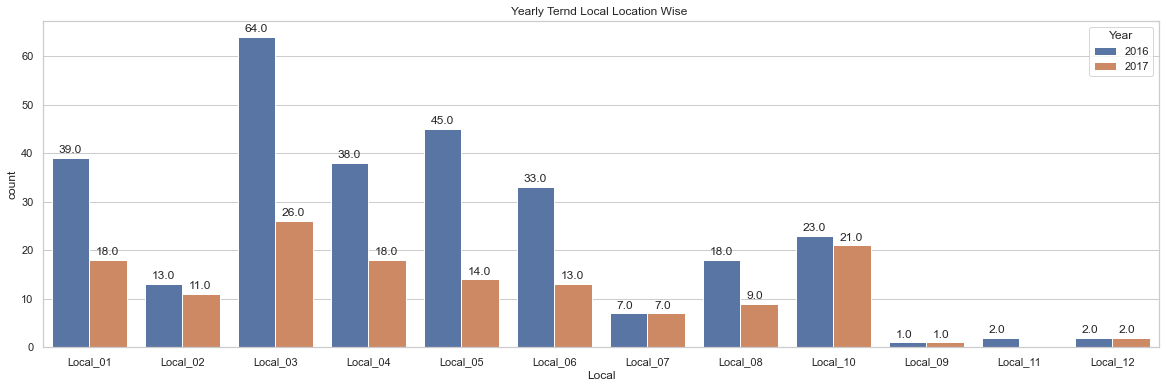

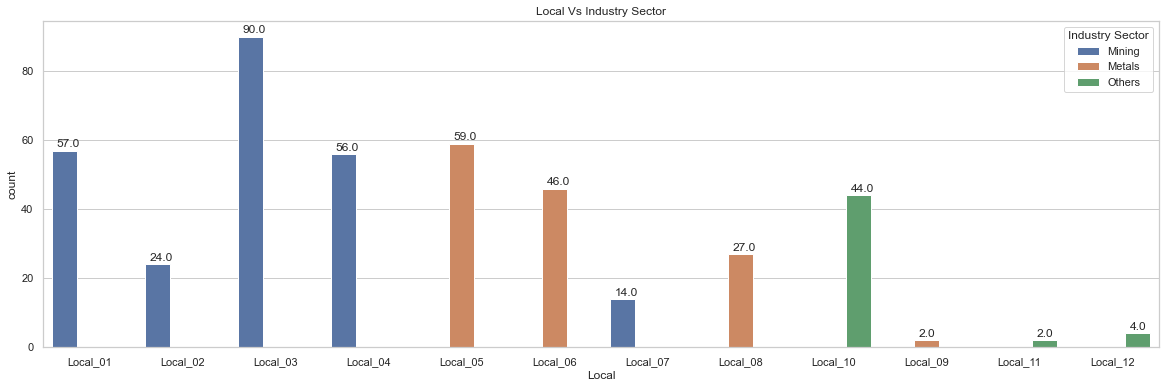

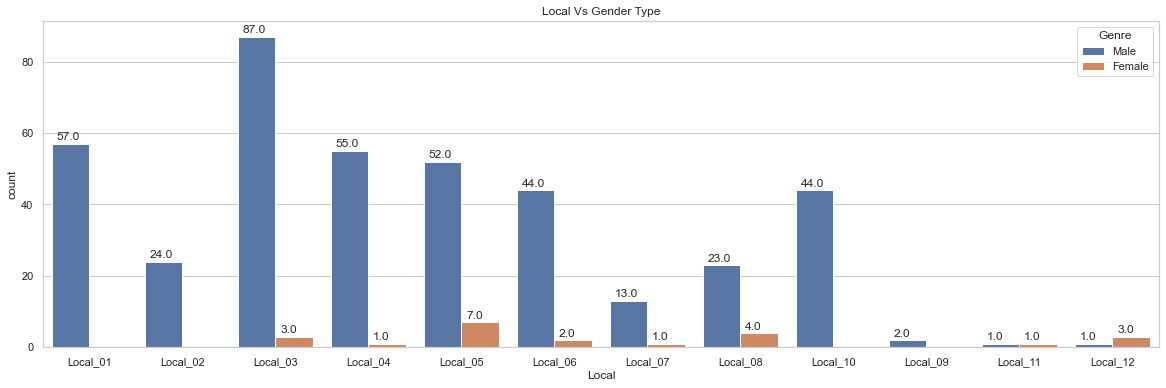

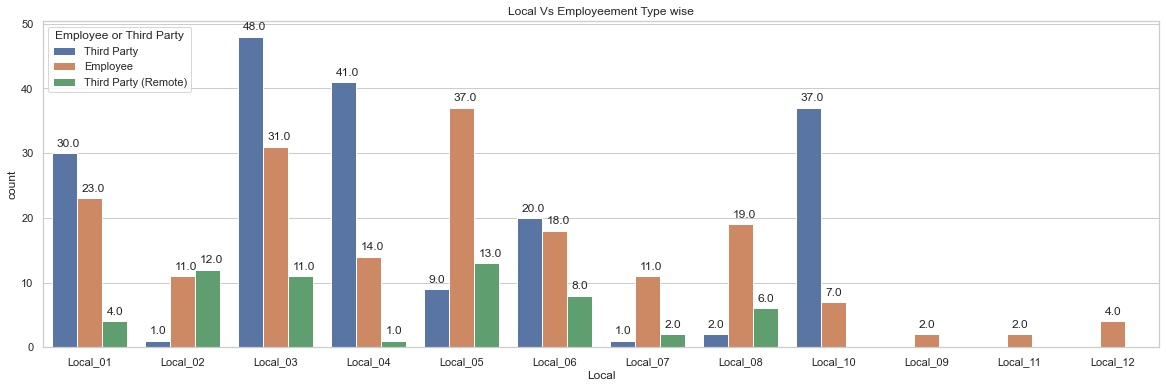

In [30]:
plt.figure(figsize=(20,6))
#plt.subplot(1,2,1)
plt.title('Yearly Ternd Local Location Wise ')
ax=sns.countplot(safety_df['Local'], hue = safety_df['Year']);
for p in ax.patches:
    ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.07, p.get_height()+1))

plt.figure(figsize=(20,6))
#plt.subplot(1,2,2)
plt.title('Local Vs Industry Sector')
ax=sns.countplot(safety_df['Local'], hue = safety_df['Industry Sector']);
for p in ax.patches:
    ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.05, p.get_height()+1))  
    
    
plt.figure(figsize=(20,6))
#plt.subplot(1,2,2)
plt.title('Local Vs Gender Type')
ax=sns.countplot(safety_df['Local'], hue = safety_df['Genre']);
for p in ax.patches:
    ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.05, p.get_height()+1))  
    
plt.figure(figsize=(20,6))
#plt.subplot(1,2,2)
plt.title('Local Vs Employeement Type wise')
ax=sns.countplot(safety_df['Local'], hue = safety_df['Employee or Third Party']);
for p in ax.patches:
    ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.05, p.get_height()+1))  

<span style="font-family: Arial; font-size:1.4em;color:green;"> Observations: </p>

i) Local_03 has reduce the number of accident from 2016 to 2017 by ~ 40%, followed by local_05 and Local_01

ii)	Local 01,02,03,04 & 07 are for mining and 05,06,08 & 09 are for Metal industries

In [31]:
safety_df['Local']=safety_df['Local'].map({'Local_01' : 0, 'Local_02' : 1,'Local_03' : 2,'Local_04' : 3,'Local_05' : 4,'Local_06' : 5,
                                        'Local_07' : 6, 'Local_08' : 7,'Local_09' : 8,'Local_10' : 9,'Local_11' : 10,'Local_12' : 11})

In [32]:
safety_df['Local'].value_counts().sort_index()

0     57
1     24
2     90
3     56
4     59
5     46
6     14
7     27
8      2
9     44
10     2
11     4
Name: Local, dtype: int64

<span style="font-family: Arial; font-size:1.4em;color:blue;"> 3.4. Attribute "Industry Sector" </p>

In [33]:
safety_df['Industry Sector'].value_counts().sort_index()

Metals    134
Mining    241
Others     50
Name: Industry Sector, dtype: int64

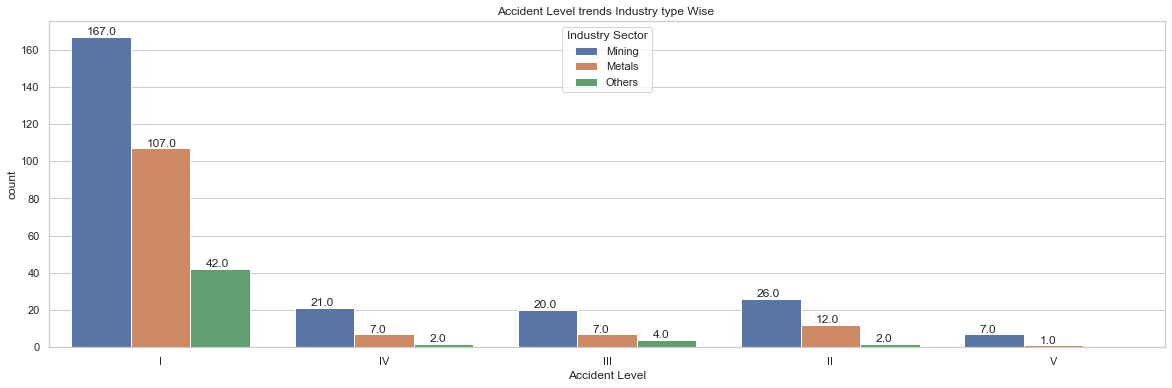

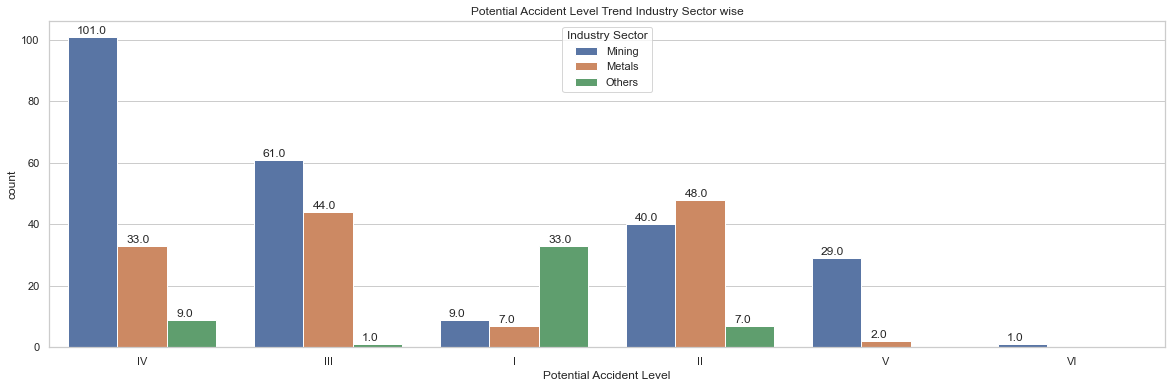

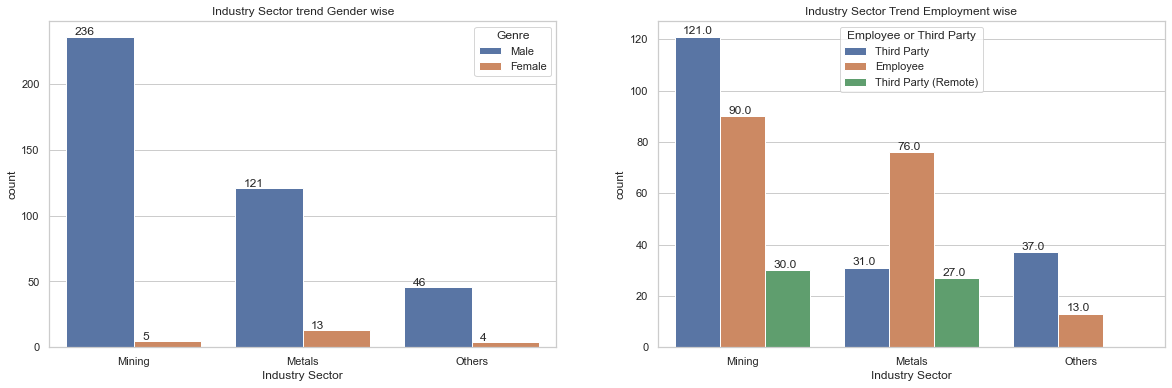

In [34]:
plt.figure(figsize=(20,6))
#plt.subplot(1,2,1)
plt.title('Accident Level trends Industry type Wise ')
ax=sns.countplot(safety_df['Accident Level'], hue = safety_df['Industry Sector']);
for p in ax.patches:
    ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.07, p.get_height()+1))

plt.figure(figsize=(20,6))
#plt.subplot(1,2,2)
plt.title('Potential Accident Level Trend Industry Sector wise')
ax=sns.countplot(safety_df['Potential Accident Level'], hue = safety_df['Industry Sector']);
for p in ax.patches:
    ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.05, p.get_height()+1)) 
    
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
plt.title('Industry Sector trend Gender wise')
ax=sns.countplot(safety_df['Industry Sector'], hue = safety_df['Genre']);
for p in ax.patches:
    ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.05, p.get_height()+1)) 
    
#plt.figure(figsize=(20,6))
plt.subplot(1,2,2)
plt.title('Industry Sector Trend Employment wise')
ax=sns.countplot(safety_df['Industry Sector'], hue = safety_df['Employee or Third Party']);
for p in ax.patches:
    ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.05, p.get_height()+1)) 

<span style="font-family: Arial; font-size:1.4em;color:green;"> Observations: </p>

i) Mining has **~56%** accidents at all type of accident levels, Level V type of accidents were only 7 in Mining & 1 accident is in Metal industry

ii)	Potential Accident Level **IV** is very significant ~ 24% in Mining followed by Level III

iii) Metal industry has 13 accidents  for female in comparison to mining has only 5

iv)	Metal industry has **~17%** accidents to employees however only ~7% of accidents were of third party employees 

In [35]:
safety_df['Industry Sector']=safety_df['Industry Sector'].map({'Mining' : 0, 'Metals' : 1,'Others' : 2})

In [36]:
safety_df['Industry Sector'].value_counts().sort_index()

0    241
1    134
2     50
Name: Industry Sector, dtype: int64

<span style="font-family: Arial; font-size:1.4em;color:blue;"> 3.5. Attribute "Accident Level" </p>

In [37]:
safety_df['Accident Level'].value_counts()

I      316
II      40
III     31
IV      30
V        8
Name: Accident Level, dtype: int64

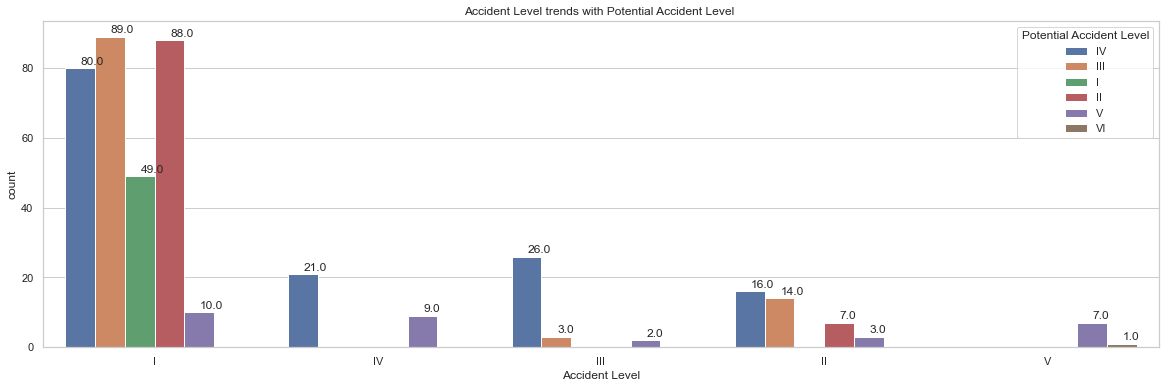

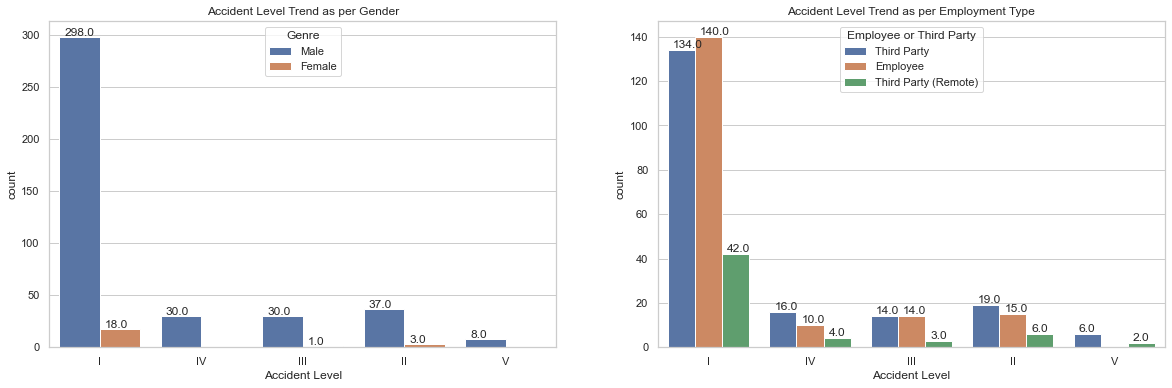

In [38]:
plt.figure(figsize=(20,6))
#plt.subplot(1,2,1)
plt.title('Accident Level trends with Potential Accident Level ')
ax=sns.countplot(safety_df['Accident Level'], hue = safety_df['Potential Accident Level']);
for p in ax.patches:
    ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.07, p.get_height()+1))

plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
plt.title('Accident Level Trend as per Gender')
ax=sns.countplot(safety_df['Accident Level'], hue = safety_df['Genre']);
for p in ax.patches:
    ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.05, p.get_height()+1))
    
#plt.figure(figsize=(20,6))
plt.subplot(1,2,2)
plt.title('Accident Level Trend as per Employment Type')
ax=sns.countplot(safety_df['Accident Level'], hue = safety_df['Employee or Third Party']);
for p in ax.patches:
    ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.05, p.get_height()+1)) 

<span style="font-family: Arial; font-size:1.4em;color:green;"> Observations: </p>

i) Only **~15%** of Level “I” type of accidents were retained at same level of potential accident remaining moved to higher levels. **~55%** of accidents were moved to II and III type of potential level

ii)	Only accident level I and II have accidents of **females**

iii) Only Level **I** accidents have slightly more employees, other have more **third party** employees


In [39]:
safety_df['Accident Level']=safety_df['Accident Level'].map({'I' : 0, 'II' : 1,'III' : 2,'IV' : 3,'V' : 4})

In [40]:
safety_df['Accident Level'].value_counts()

0    316
1     40
2     31
3     30
4      8
Name: Accident Level, dtype: int64

<span style="font-family: Arial; font-size:1.4em;color:blue;"> 3.6. Attribute "Potential Accident Level" </p>

In [41]:
safety_df['Potential Accident Level'].value_counts().sort_index()

I       49
II      95
III    106
IV     143
V       31
VI       1
Name: Potential Accident Level, dtype: int64

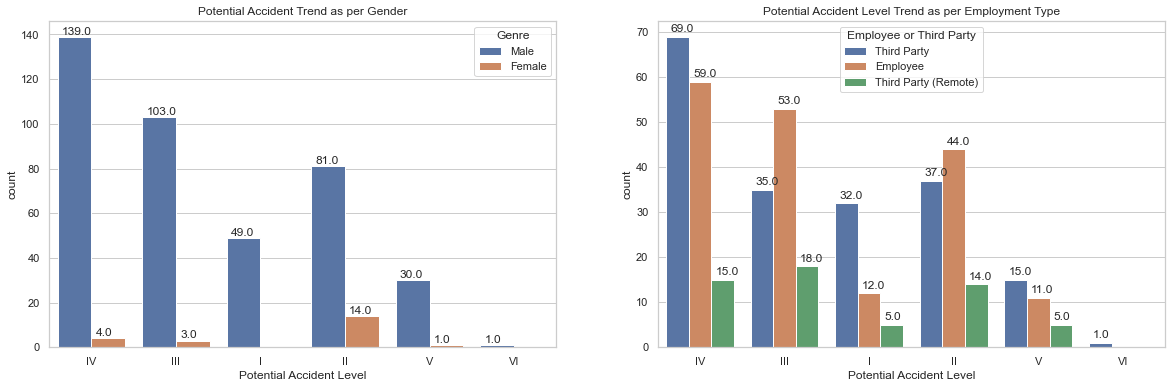

In [42]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
plt.title('Potential Accident Trend as per Gender')
ax=sns.countplot(safety_df['Potential Accident Level'], hue = safety_df['Genre']);
for p in ax.patches:
    ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.05, p.get_height()+1))
    
#plt.figure(figsize=(20,6))
plt.subplot(1,2,2)
plt.title('Potential Accident Level Trend as per Employment Type')
ax=sns.countplot(safety_df['Potential Accident Level'], hue = safety_df['Employee or Third Party']);
for p in ax.patches:
    ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.05, p.get_height()+1)) 

<span style="font-family: Arial; font-size:1.4em;color:green;"> Observations: </p>

i)	**~33%** of potential accidents were of type **IV** category which has 97% of male employees

ii)	**~48%** of employees were **third party employees** ~40% were employees in type IV potential accident category

iii) Type III potential accident category has **~25%** of total accidents, female employees accidents were only 3 out of 103 in this category

iv)	**~50%** of type III accidents were of employees and **~33%** of accidents were of third party employees

In [43]:
safety_df['Potential Accident Level']=safety_df['Potential Accident Level'].map({'I' : 0, 'II' : 1,'III' : 2,'IV' : 3,'V' : 4,'VI' : 5})

In [44]:
safety_df['Potential Accident Level'].value_counts().sort_index()

0     49
1     95
2    106
3    143
4     31
5      1
Name: Potential Accident Level, dtype: int64

<span style="font-family: Arial; font-size:1.4em;color:blue;"> 3.7. Potential Attribute "Genre" </p>

In [45]:
safety_df['Genre'].value_counts()

Male      403
Female     22
Name: Genre, dtype: int64

In [46]:
safety_df['Genre']=safety_df['Genre'].map({'Male' : 0, 'Female' : 1})

In [47]:
safety_df['Genre'].value_counts()

0    403
1     22
Name: Genre, dtype: int64

<span style="font-family: Arial; font-size:1.4em;color:green;"> Observations: </p>

* Genre has two categories Male & Female. Male Contribution is ~ 95%. Different analysis has already been done in above section therefore not repeating in this section

<span style="font-family: Arial; font-size:1.4em;color:blue;"> 3.8. Potential Attribute "Employee or Third Party" </p>

In [48]:
safety_df['Employee or Third Party'].value_counts()

Third Party             189
Employee                179
Third Party (Remote)     57
Name: Employee or Third Party, dtype: int64

In [49]:
safety_df['Employee or Third Party']=safety_df['Employee or Third Party'].map({'Third Party' : 0, 'Employee' : 1,'Third Party (Remote)' : 2})

In [50]:
safety_df['Employee or Third Party'].value_counts()

0    189
1    179
2     57
Name: Employee or Third Party, dtype: int64

<span style="font-family: Arial; font-size:1.4em;color:green;"> Observations: </p>

* Employee Type has tree categories Third Party, Employee and Third Party (Remote). Third Party has a contribution of **~ 44%** and employees has **~42% and remaining ~4%** is of third party (Remote) employees. Different analysis has already been done in above section therefore not repeating in this section

<span style="font-family: Arial; font-size:1.4em;color:blue;"> 3.9. Critical Risk" </p>

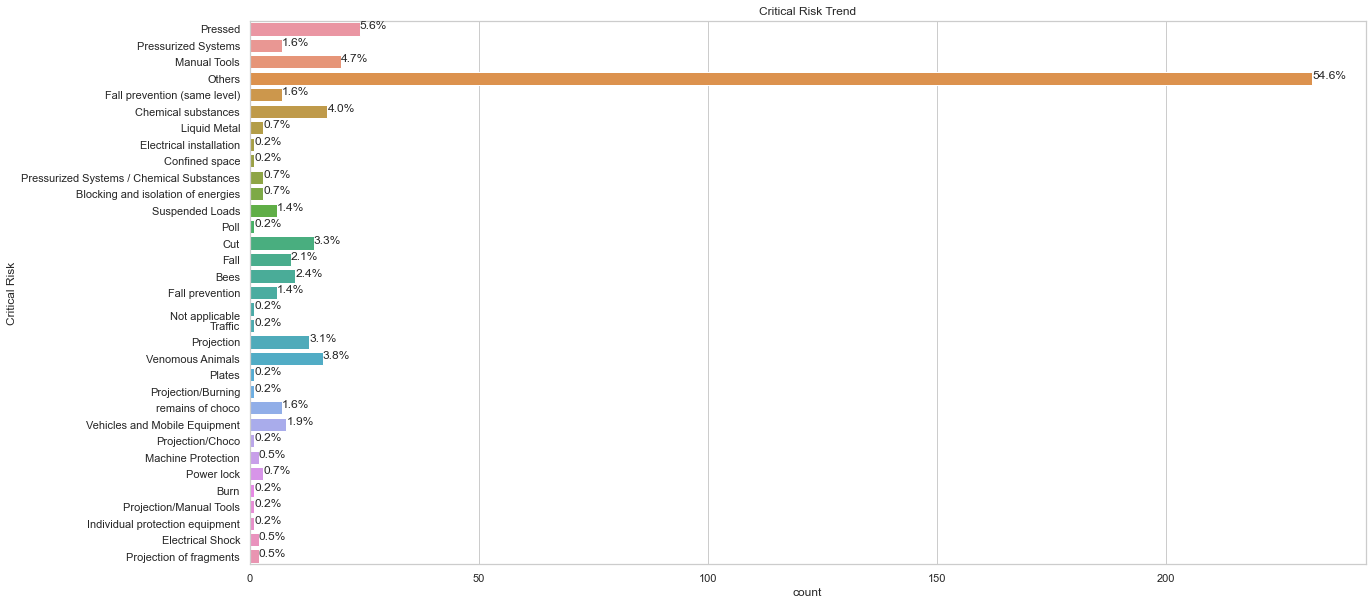

In [51]:
plt.figure(figsize=(20,10))
# plt.subplot(1,3,1)
plt.title('Critical Risk Trend')
ax=sns.countplot(y=safety_df['Critical Risk'])

total = len(safety_df['Critical Risk'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))


<span style="font-family: Arial; font-size:1.4em;color:green;"> Observations: </p>

* Under Critical Risk attribute there are 33 different categories, **Others category** has maximum contribution of **54%** followed by **Pressed ~6%** and **manual tools as 4.7%**


In [52]:
# Convert the values into integers
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
safety_df['Critical Risk'] = lb.fit_transform(safety_df[['Critical Risk']])

In [53]:
safety_df['Critical Risk'].value_counts().sort_index()

0       1
1      10
2       3
3       1
4      17
5       1
6      14
7       2
8       1
9       9
10      6
11      7
12      1
13      3
14      2
15     20
16    232
17      1
18      1
19      3
20     24
21      7
22      3
23     13
24      2
25      1
26      1
27      1
28      6
29      1
30      8
31     16
32      7
Name: Critical Risk, dtype: int64

In [54]:
# Validate the datatype of attributes
safety_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Unnamed: 0                425 non-null    int64         
 1   Date                      425 non-null    datetime64[ns]
 2   Countries                 425 non-null    int64         
 3   Local                     425 non-null    int64         
 4   Industry Sector           425 non-null    int64         
 5   Accident Level            425 non-null    int64         
 6   Potential Accident Level  425 non-null    int64         
 7   Genre                     425 non-null    int64         
 8   Employee or Third Party   425 non-null    int64         
 9   Critical Risk             425 non-null    int32         
 10  Description               425 non-null    object        
 11  Year                      425 non-null    int64         
 12  Month                 

<span style="font-family: Arial; font-size:1.4em;color:green;"> Observations: </p>

* Now all the datatype (except Description and season) have been converted. Date has been changed to Datetime 

<span style="font-family: Arial; font-size:1.4em;color:blue;"> 3.10. Conduct the multi-variate Analysis </p>

In [55]:
# Drop the irrlevant columns
df_corr=safety_df.drop(['Description','Weekday','season','Year','Month','Day','Weekofyear'],axis=1)

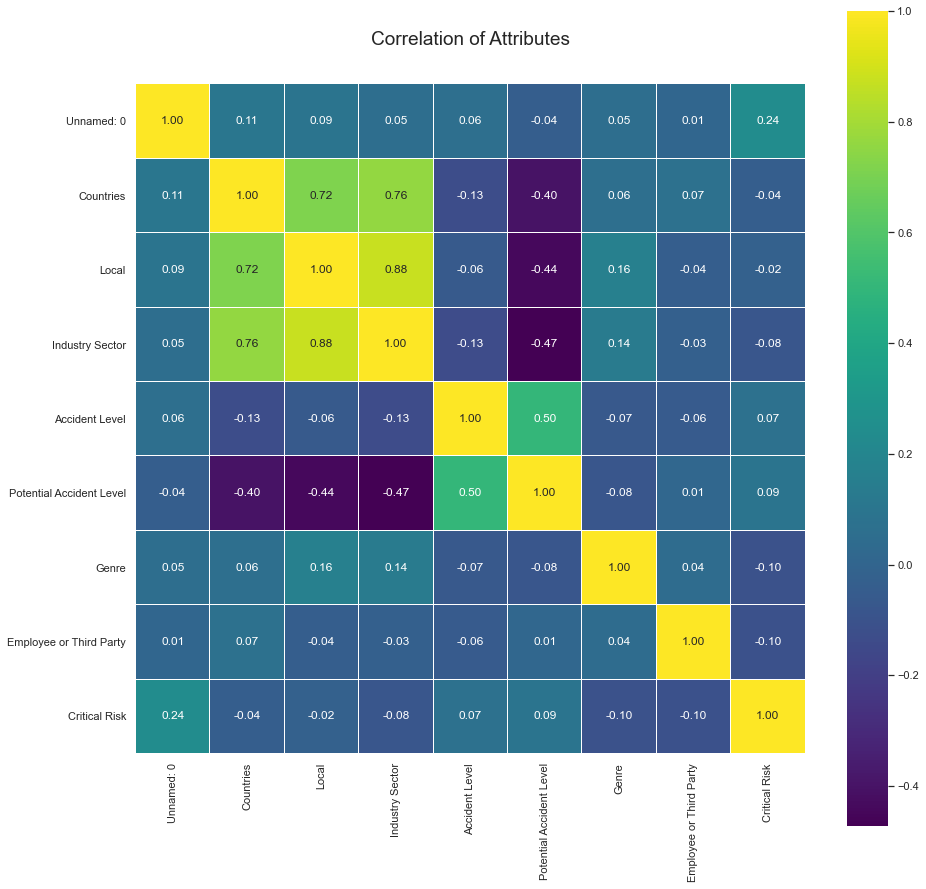

In [56]:
colormap = plt.cm.viridis
plt.figure(figsize=(15,15))
plt.title('Correlation of Attributes', y=1.05, size=19)
corr=sns.heatmap(df_corr.corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True,fmt='.2f');

<span style="font-family: Arial; font-size:1.4em;color:green;"> Observations: </p>

* it is observed that Local and Conunty has a positive correlation of .72
* Similarly Country and Industry sector also as a positive correlation of .76
* Industry and local also has .88 relationship
* There is also a negative correlation of ~ .40 to .47 between Potential accident Level and  Countiries, Local and Industry 
sector

<span style="font-family: Arial; font-size:1.4em;color:blue;"> 3.11. Removing the irrelevant column </p>

In [57]:
safety_df=safety_df.drop('Unnamed: 0', axis=1)
safety_df.head()

,Date,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description,Year,Month,Day,Weekday,Weekofyear,season
0,2016-01-01,0,0,0,0,3,0,0,20,While removing the drill rod of the Jumbo 08 f...,2016,1,1,Friday,53,Summer
1,2016-01-02,1,1,0,0,3,0,1,21,During the activation of a sodium sulphide pum...,2016,1,2,Saturday,53,Summer
2,2016-01-06,0,2,0,0,2,0,2,15,In the sub-station MILPO located at level +170...,2016,1,6,Wednesday,1,Summer
3,2016-01-08,0,3,0,0,0,0,0,16,Being 9:45 am. approximately in the Nv. 1880 C...,2016,1,8,Friday,1,Summer
4,2016-01-10,0,3,0,3,3,0,0,16,Approximately at 11:45 a.m. in circumstances t...,2016,1,10,Sunday,1,Summer


<span style="font-family: Arial; font-size:1.4em;color:blue;"> 3.12. Now Check Duplicate Values </p>

In [58]:
aa=sum(safety_df.duplicated())
if aa > 0:
    print("\033[1m""There are {:.0f} duplicates rows in the DataFrame""\033[0m".format(aa))
else:
    print("\033[1m""There are no duplicates rows in the DataFrame""\033[0m")


There are 7 duplicates rows in the DataFrame


In [59]:
safety_df[safety_df.duplicated()]

,Date,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description,Year,Month,Day,Weekday,Weekofyear,season
77,2016-04-01,0,0,0,0,4,0,2,16,In circumstances that two workers of the Abrat...,2016,4,1,Friday,13,Autumn
262,2016-12-01,0,2,0,0,3,0,1,16,During the activity of chuteo of ore in hopper...,2016,12,1,Thursday,48,Spring
303,2017-01-21,1,1,0,0,0,0,2,16,Employees engaged in the removal of material f...,2017,1,21,Saturday,3,Summer
345,2017-03-02,2,9,2,0,0,0,0,31,On 02/03/17 during the soil sampling in the re...,2017,3,2,Thursday,9,Summer
346,2017-03-02,2,9,2,0,0,0,0,31,On 02/03/17 during the soil sampling in the re...,2017,3,2,Thursday,9,Summer
355,2017-03-15,2,9,2,0,0,0,0,31,Team of the VMS Project performed soil collect...,2017,3,15,Wednesday,11,Summer
397,2017-05-23,0,3,0,0,3,0,0,24,In moments when the 02 collaborators carried o...,2017,5,23,Tuesday,21,Autumn


In [60]:
# safety_df.drop_duplicates(keep='first',inplace=True)
#safety_df.shape

In [61]:
import nltk
from nltk.corpus import stopwords
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

<span style="font-family: Arial; font-size:2em;color:gold;">4. Clean-up of Description Attribute
[<span style="float: right;font-weight:bold;font-size:.65em;color:#000080;">TOP](#q10)
<a id='q4'></a>


<span style="font-family: Arial; font-size:1.4em;color:blue;"> 4.1 Lemmatization & Clean up Description Attribute </p>

In [62]:
wl=WordNetLemmatizer()

In [63]:
def clean_up(x):
    check=re.compile('[^A-Za-z0-9\s]')
    text=check.sub('',x)
    text=text.lower()
    text=text.replace('employee ','')
    text=text.replace('operator ','')
    text=text.replace('activity ','')
    text=text.replace('moment ','')
    text=text.replace('assistant ','')
    text=text.replace('collaborator ','')
    text=text.replace('causing ','')
    text=text.replace('worker ','')
    text=text.replace('area ','')
    text = re.sub(r"im", "i am", text)
    text = re.sub(r"hes", "he is", text)
    text = re.sub(r"shes", "she is", text)
    text = re.sub(r"thats", "that is", text)        
    text = re.sub(r"whats", "what is", text)
    text = re.sub(r"wheres", "where is", text) 
    text = re.sub(r"\'ll", " will", text)  
    text = re.sub(r"\'ve", " have", text)  
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"wont", "will not", text)
    text = re.sub(r"dont", "do not", text)
    text = re.sub(r"didt", "did not", text)
    text = re.sub(r"cant", "can not", text)
    text = re.sub(r"its", "it is", text)
    text = re.sub(r"couldnt", "could not", text)
    text = re.sub(r"havet", "have not", text)
    text = re.sub(r"[,.\"\'!@#$%^&*(){}?/;`~:<>+=-]", "", text)
    text=text.split()
    text=[wl.lemmatize(word) for word in text if not word in stopwords.words('english')]
    text=' '.join(text)
    return text

In [64]:
def CleanTokenize(df):
    corpus = list()
    lines = df.values.tolist()

    for line in lines:
        line = clean_up(line)
        corpus.append(line)
    return corpus

In [65]:
corpus=CleanTokenize(safety_df['Description'])

In [66]:
safety_df['Clean_description']=pd.DataFrame(corpus)

In [67]:
safety_df['Clean_description']

0      removing drill rod jumbo 08 maintenance superv...
1      activation sodium sulphide pump piping uncoupl...
2      substation milpo located level 170 excavation ...
3      945 approxi amately nv 1880 cx695 ob7 personne...
4      approxi amately 1145 circumstance mechanic ant...
                             ...                        
420    approxi amately 500 approxi amately lifting ke...
421    moved infrastructure office julio toilet pin r...
422    environmental monitoring surprised swarming sw...
423    performed stripping cathode pulling cathode sh...
424    1000 cleaned floor module e central camp slipp...
Name: Clean_description, Length: 425, dtype: object

<span style="font-family: Arial; font-size:1.4em;color:blue;"> 4.2 Save the Clean Data </p>

In [68]:
safety_df.to_csv('cleaned_data.csv')

<span style="font-family: Arial; font-size:2em;color:gold;">5. Word Cloud
[<span style="float: right;font-weight:bold;font-size:.65em;color:#000080;">TOP](#q10)
<a id='q5'></a>

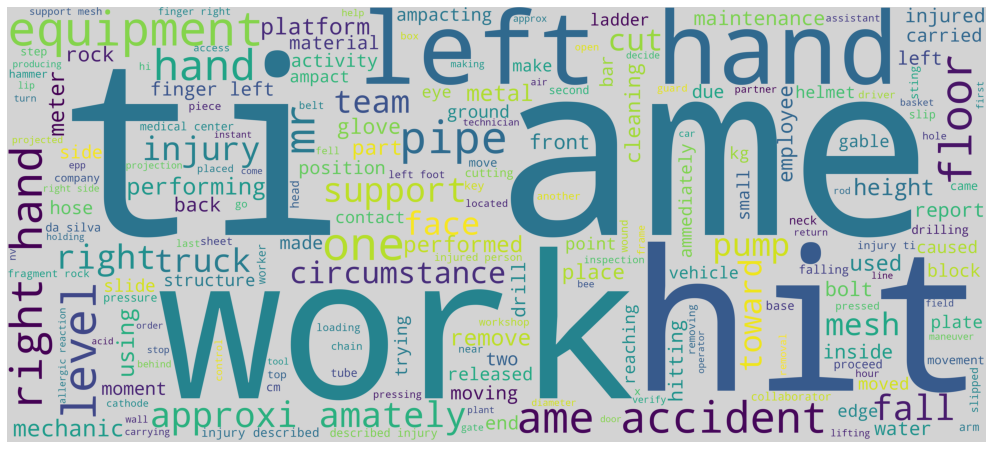

In [69]:
#After Clean-up
from wordcloud import WordCloud,STOPWORDS
Pos_text=safety_df['Clean_description']
wordcloud2 = WordCloud(stopwords=STOPWORDS,background_color='lightgray',width=4500,height=2000).generate(" ".join(Pos_text))

plt.figure(figsize=(20,8))
plt.imshow(wordcloud2)
plt.axis('off')
plt.show()

<span style="font-family: Arial; font-size:1.4em;color:green;"> Observations: </p>

* Word Cloud had word like left hand, time, Level, hit, pipe, floor, fall, Cut, bolt, drill etc.

<span style="font-family: Arial; font-size:2em;color:gold;">6. NLP Pre-Processing
[<span style="float: right;font-weight:bold;font-size:.65em;color:#000080;">TOP](#q10)
<a id='q6'></a>

<span style="font-family: Arial; font-size:1.4em;color:blue;"> 6.1 Define the Max Features </p>

In [70]:
max_features = 3000 # Number of words to take from tokenizer(most frequent words)
maxlen = 30 # Maximum length of each sentence to be limited to
embedding_size = 100 # size of embedding vector

<span style="font-family: Arial; font-size:1.4em;color:blue;"> 6.2 Tokenizer </p>

In [71]:
tokenizer = Tokenizer(num_words=max_features, split=' ')

In [72]:
tokenizer.fit_on_texts(safety_df['Clean_description'].values)

In [73]:
X = tokenizer.texts_to_sequences(safety_df['Clean_description'].values)

<span style="font-family: Arial; font-size:1.4em;color:blue;"> 6.3 Get Word Index </p>

In [74]:
word_index=tokenizer.word_index

In [75]:
len(word_index)

3237

In [76]:
word_index

{'hand': 1,
 'left': 2,
 'right': 3,
 'ti': 4,
 'injury': 5,
 'ame': 6,
 'one': 7,
 'work': 8,
 'equipment': 9,
 'finger': 10,
 'accident': 11,
 'pipe': 12,
 'level': 13,
 'hit': 14,
 'floor': 15,
 'support': 16,
 'mesh': 17,
 'rock': 18,
 'approxi': 19,
 'fall': 20,
 'mr': 21,
 'safety': 22,
 'glove': 23,
 'meter': 24,
 'amately': 25,
 'team': 26,
 'height': 27,
 'part': 28,
 'side': 29,
 'described': 30,
 'circumstance': 31,
 'pump': 32,
 'truck': 33,
 'face': 34,
 'cut': 35,
 'metal': 36,
 'used': 37,
 'kg': 38,
 'injured': 39,
 'place': 40,
 'towards': 41,
 'medical': 42,
 'performing': 43,
 'mechanic': 44,
 'two': 45,
 'using': 46,
 'point': 47,
 'foot': 48,
 'platform': 49,
 'made': 50,
 'cm': 51,
 'remove': 52,
 'end': 53,
 'performed': 54,
 'generating': 55,
 'access': 56,
 'maintenance': 57,
 'fragment': 58,
 'employee': 59,
 'inside': 60,
 '2': 61,
 'x': 62,
 'plate': 63,
 'drill': 64,
 'cleaning': 65,
 'back': 66,
 'activity': 67,
 'front': 68,
 'structure': 69,
 'arm': 70,


<span style="font-family: Arial; font-size:1.4em;color:blue;"> 6.4 Defnie Vocabulary Size </p>

In [77]:
vocab_size = len(tokenizer.word_index) + 1
print(vocab_size)

3238


In [78]:
X=sequence.pad_sequences(X,maxlen=maxlen)

<span style="font-family: Arial; font-size:1.4em;color:blue;"> 6.5 Redefine the FeatureSet & Target Class (Post Merge the with other features of the dataset)</p>

In [79]:
# Convert into a DataFrame
X1=pd.DataFrame(X)
#Merge with Main DF
new_df=pd.concat([X1,safety_df],axis=1)

In [80]:
#new shape of the DataFrame
new_df.shape

(425, 47)

In [81]:
# Define X & Y
X=new_df.drop(['Critical Risk','Date','Description','Year','Month','Day','Weekday','Weekofyear','season','Clean_description'], axis=1)
y=new_df['Critical Risk']

In [82]:
# Split into train & Test
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=1)

<span style="font-family: Arial; font-size:1.4em;color:blue;"> 6.6 Define the Shape</p>

In [83]:
print('Shape of X_train is: ', X_train.shape)
print('Shape of X_test is: ',X_test.shape)
print('Shape of y_train is: ', y_train.shape)
print('Shape of y_test is: ',y_test.shape)

Shape of X_train is:  (340, 37)
Shape of X_test is:  (85, 37)
Shape of y_train is:  (340,)
Shape of y_test is:  (85,)


<span style="font-family: Arial; font-size:2em;color:gold;">7. Define the Base Model
[<span style="float: right;font-weight:bold;font-size:.65em;color:#000080;">TOP](#q10)
<a id='q7'></a>

<span style="font-family: Arial; font-size:1.4em;color:blue;"> 7.1 SVC Model</p>

In [84]:
from sklearn.svm import SVC 

In [85]:
# Training & fit the model only based on description extracted features set
svc_model=SVC()
svc_model.fit(X_train,y_train)
print("Accuracy of SVC Model on the test data is %.2f" % svc_model.score(X_test,y_test))

Accuracy of SVC Model on the test data is 0.61


<span style="font-family: Arial; font-size:1.4em;color:blue;"> 7.2 LSTM</p>

In [86]:
model1=Sequential()
model1.add(Embedding(vocab_size,embedding_size,input_length=maxlen))
model1.add((LSTM(128)))
model1.add(Dense(10,activation='sigmoid')) 
model1.add(Dense(1,activation='sigmoid')) 
model1.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model1.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 30, 100)           323800    
_________________________________________________________________
lstm (LSTM)                  (None, 128)               117248    
_________________________________________________________________
dense (Dense)                (None, 10)                1290      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 442,349
Trainable params: 442,349
Non-trainable params: 0
_________________________________________________________________
None


In [87]:
history = model1.fit(X_train, y_train, batch_size=128, epochs=5, validation_data=(X_test, y_test), verbose=2)

Epoch 1/5
3/3 - 3s - loss: 0.0000e+00 - accuracy: 0.0294 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/5
3/3 - 0s - loss: 0.0000e+00 - accuracy: 0.0294 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 3/5
3/3 - 0s - loss: 0.0000e+00 - accuracy: 0.0294 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 4/5
3/3 - 0s - loss: 0.0000e+00 - accuracy: 0.0294 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 5/5
3/3 - 0s - loss: 0.0000e+00 - accuracy: 0.0294 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
